## VIDEO TO FRAMES

Esta parte del código requiere la ruta donde se aloja el video, y genera los frames de los videos para el Método 1 y Método 2, no es necesario recortar los videos, o eliminar los frames, el código no procesa los primeros y los últimos frames de cada video.

Solo cambiar la ruta del video

In [40]:
# Cambiar aquí por el nombre del video a analizar
filename = 'G_3_Altair_290824_22_30_DSC0028_Mascara'

In [41]:
import cv2
import os

# Ruta del video
video_path = (f"videos/{filename}.MOV") # Asume que el video está en una carpeta llamada videos

# Extraer el nombre del archivo sin la extensión para usar como nombre de la carpeta
video_name = os.path.splitext(os.path.basename(video_path))[0]

# Crear una carpeta con el nombre del video si no existe
output_folder = os.path.join("data", video_name)
if not os.path.exists(output_folder):
    try:
        os.makedirs(output_folder)
    except OSError:
        print("Error: Creating directory of data")
        exit(1)

# Abrir el video
cam = cv2.VideoCapture(video_path)

# Inicializar el contador de frames
currentframe = 0

while True:
    # Leer un frame del video
    ret, frame = cam.read()

    if ret:
        # Si hay frames disponibles, continuar creando imágenes
        name = os.path.join(output_folder, f"frame{currentframe}.jpg")
        print(f"Creating... {name}")

        # Guardar la imagen extraída
        cv2.imwrite(name, frame)

        # Incrementar el contador de frames
        currentframe += 1
    else:
        break

# Liberar todos los recursos y cerrar ventanas una vez terminado
cam.release()
cv2.destroyAllWindows()

Creating... data/G_3_Altair_290824_22_30_DSC0028_Mascara/frame0.jpg
Creating... data/G_3_Altair_290824_22_30_DSC0028_Mascara/frame1.jpg
Creating... data/G_3_Altair_290824_22_30_DSC0028_Mascara/frame2.jpg
Creating... data/G_3_Altair_290824_22_30_DSC0028_Mascara/frame3.jpg
Creating... data/G_3_Altair_290824_22_30_DSC0028_Mascara/frame4.jpg
Creating... data/G_3_Altair_290824_22_30_DSC0028_Mascara/frame5.jpg
Creating... data/G_3_Altair_290824_22_30_DSC0028_Mascara/frame6.jpg
Creating... data/G_3_Altair_290824_22_30_DSC0028_Mascara/frame7.jpg
Creating... data/G_3_Altair_290824_22_30_DSC0028_Mascara/frame8.jpg
Creating... data/G_3_Altair_290824_22_30_DSC0028_Mascara/frame9.jpg
Creating... data/G_3_Altair_290824_22_30_DSC0028_Mascara/frame10.jpg
Creating... data/G_3_Altair_290824_22_30_DSC0028_Mascara/frame11.jpg
Creating... data/G_3_Altair_290824_22_30_DSC0028_Mascara/frame12.jpg
Creating... data/G_3_Altair_290824_22_30_DSC0028_Mascara/frame13.jpg
Creating... data/G_3_Altair_290824_22_30_DSC

## Frames Analysis

Aquí se determina la distancia entre los spot de las estrellas del método 1 y el método 2. 

Insertar la ruta donde se guardaron los frames


 Su carpeta tiene 8511 archivos .jpg 

          ....            

Se procesarán los frames del:3404 al:6808

          ....            
No. 1: /frame3404.jpg
          ....            
No. 6808: /frame6808.jpg
          ....            
          ....            

 :: CONSTRUYENDO EL HISTOGRAMA :: 

          ....            
No se encontraron estrellas.
No se encontraron estrellas.
No se encontraron estrellas.
No se encontraron estrellas.
No se encontraron estrellas.
No se encontraron estrellas.
No se encontraron estrellas.
No se encontraron estrellas.
No se encontraron estrellas.
No se encontraron estrellas.
No se encontraron estrellas.
No se encontraron estrellas.
No se encontraron estrellas.
No se encontraron estrellas.
No se encontraron estrellas.
No se encontraron estrellas.
No se encontraron estrellas.
No se encontraron estrellas.
No se encontraron estrellas.
No se encontraron estrellas.
No se encontraron estrellas.
No se encontraron estrellas.
No se encontraron estrellas.
No 

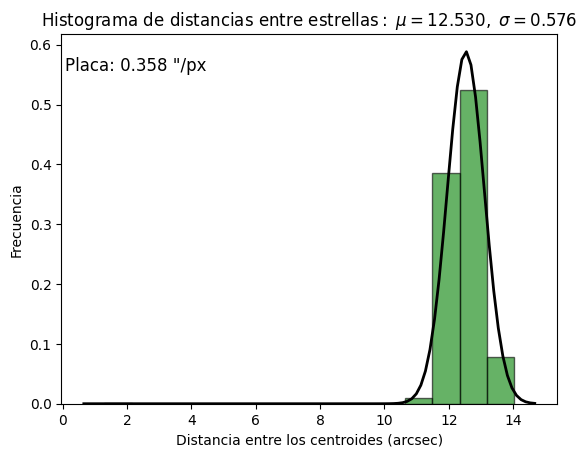

In [44]:
"""________________Distance_IMG______________
Programa que construye el histograma de frecuencias de la separación 
entre dos "spots" (objetos) en el DIMM."""

"""_________________Libraries________________________"""
import cv2
import glob
import numpy as np
from scipy.stats import norm
from scipy.spatial import distance as dist
import matplotlib.pyplot as plt
import re
"""__________________________________________________"""


"""__________________FUNCTIONS_______________________"""
# Definir una función con parámetros de Open CV
def identify_stars_and_distance(image_path):
    # Cargar imagen con filtro en escala de grises
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)


    # Aplicar un umbral para binarizar la imagen y destacar los objetos (estrellas) Este parámetro se puede variar según la intensidad de la estrella
    _, thresh = cv2.threshold(image, 50, 255, cv2.THRESH_BINARY)


    # Encontrar los contornos de los objetos (estrellas)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


    # Filtrar unicamente los dos contornos más grandes detectados (asumiendo que son las estrellas)
    contours = sorted(contours, key=cv2.contourArea, reverse=True)[:2]
    
    # Obtener los centros de las dos estrellas
    star_centers = []  #crear un vector para guardar los centros
    for contour in contours:
        M = cv2.moments(contour) #calcula los momentos del contorno, función de Open CV
        if M["m00"] != 0:  # moo es el area del contorno
            cX = int(M["m10"] / M["m00"])  #m10 es el momento espacial para calcular las coordenadas del centroide
            cY = int(M["m01"] / M["m00"])  #m01 es el momento espacial para calcular las coordenadas del centroide
            star_centers.append((cX, cY)) #guardar las coordenadas de los centros encontrados


    # Calcular la distancia entre las dos estrellas
    if len(star_centers) == 2:
        pixel_distance = dist.euclidean(star_centers[0], star_centers[1])
        return(pixel_distance)
    else:
        print("No se encontraron estrellas.")
        return 0

    # Mostrar la imagen con los centros de las estrellas marcados
    #plt.imshow(image, cmap='gray')
    #plt.title(f"Distancia en pixeles: {pixel_distance:.2f}")
    #plt.show()
    

# Definir una funcion para extraer el numero del frame dek nombre del archivo
def extract_frame_number(filename):
    match = re.search(r'frame(\d+)\.jpg', filename)
    return int(match.group(1)) if match else -1

"""__________________________________________________"""


"""_____________________SCALE________________________"""
scale_size = 0.358  # segundos de arco por px ('' /px)

"""__________________________________________________"""


"""_____________________MAIN_________________________"""
# Abrir carpeta donde se encuentran los frames del video
carpeta = f"data/{filename}"


# Busqueda de los archivos .jpg
archivos = glob.glob(carpeta + r"/*.jpg")

# Ordenar los archivos numéricamente por el número de frame en el nombre asi (0, 1, 2, 3, ...)
archivos.sort(key=extract_frame_number)

# Definir los frames que se procesaran, se escogieron unicamente los frames entre el 40% y el 80% para eliminar errores al inicio y fin
start = int(len(archivos)*0.40)
end = int(len(archivos)*0.80)

nombres = []
for j in archivos:
    if carpeta in j:
        nombres.append(j.replace(carpeta, ""))


if nombres != []:
    l = len(nombres)
    print(f"\n Su carpeta tiene {l} archivos .jpg \n")
    print(f"          ....            ")
    print(f"\nSe procesarán los frames del:{start} al:{end}\n")
    print(f"          ....            ")
    print(f"No. 1: {nombres[start]}")
    print(f"          ....            ")
    print(f"No. {end}: {nombres[end]}")
    print(f"          ....            ")
    print(f"          ....            ")
    print("\n :: CONSTRUYENDO EL HISTOGRAMA :: \n")
    print(f"          ....            ")
else:
    print("\n Su carpeta no tiene archivos .jpg \n")

distances = []


for k in range(start, end):
    # Usar la función en un frame
    identify_stars_and_distance(archivos[k])
    #print(f"archivo {archivos[k]}") #verificar si se están ejecutando los frames en orden
    distances.append(identify_stars_and_distance(archivos[k])*scale_size)


# Guardar las distancias en un archivo llamado nombre_del_video.dat
np.savetxt(f"{filename}.dat", distances, fmt="%.6f", header="Distancias entre estrellas (arcsec)")

distances = np.loadtxt('out.dat')
distances = distances[np.where(distances!=0)]

# Ajuste de los datos a una distribución normal
mu, std = norm.fit(distances)
# Normalizar los valores del histograma
weights = np.ones_like(distances) / len(distances)
# Graficar el histograma con las distancias
count, bins, ignored = plt.hist(distances, weights=weights, bins=15, alpha=0.6, color="g", edgecolor="black")

# Graficar la función de densidad de probabilidad (PDF) ajustada
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

# Normalizar la PDF para que se ajuste al histograma
bin_width = bins[1] - bins[0]
p_normalized = p * bin_width  # Ajuste el área de la PDF al histograma
plt.plot(x, p_normalized, "k", linewidth=2)


# Mostrar los valores de mu y sigma
print(f"Media (mu): {mu:.3f}, Desviación estándar (sigma): {std:.3f}")


# Grafico
plt.title(r"$\mathrm{Histograma\ de\ distancias\ entre\ estrellas:}\ \mu=%.3f,\ \sigma=%.3f$" % (mu, std))
plt.xlabel("Distancia entre los centroides (arcsec)")
plt.ylabel("Frecuencia")
plt.text(0.15, 0.9, f"Placa: {scale_size} \"/px", transform=plt.gca().transAxes, fontsize=12, color='black', ha='center')
plt.show()

### DESENFOQUE Y REGISTRO DEL MOVIMIENTO DIFERENCIAL (revisar ecuaciones se deja para análisis de cada grupo)

Revisar estas ecuaciones en las presentaciones de clase, para un solo sigma, de acuerdo a lo conversado en clase

$$
\sigma (l)^2 = 2\lambda^2[0.179/D_{Hole}^{1/3} - 0.097/d_{sep}^{1/3}]r_0(l)^{-5/3}
$$

$$
\sigma (t)^2 = 2\lambda^2[0.179/D_{Hole}^{1/3} - 0.145/d_{sep}^{1/3}]r_0(t)^{-5/3}
$$

Despejando  $r_0$
$$
r_0(l)^{-5/3} = \sigma (l)^2 / {( 2\lambda^2[0.179/D_{Hole}^{1/3} - 0.097/d_{sep}^{1/3}])}
$$

$$
r_0(t)^{-5/3} = \sigma (l)^2 / {( 2\lambda^2[0.179/D_{Hole}^{1/3} - 0.145/d_{sep}^{1/3}])}
$$

In [45]:
Dhole = 5  #diametro de la apertura  en cm
dsep =  12 #diametro de la separacion de las aperturas en cm

lamb = 0.5 #longitud de onda en micrometros (um)

r_l =  (mu**2 / (2*lamb**2*((0.179/Dhole**(1/3))-(0.097/dsep**(1/3)))))**(-3/5)
r_t =  (mu**2 / (2*lamb**2*((0.179/Dhole**(1/3))-(0.145/dsep**(1/3)))))**(-3/5)
print (f"El valor para el parametro de Fried (l) es: {r_l:.3f}")
print (f"El valor para el parametro de Fried (t) es:{r_t:.3f}")


El valor para el parametro de Fried (l) es: 0.006
El valor para el parametro de Fried (t) es:0.005


Seeing :
$$
\Delta \theta = 0.98 \lambda / r_0
$$

In [46]:
FWHM_l = 0.98*lamb/r_l
FWHM_t = 0.98 * lamb / r_t
print (f"El valor del Seeing (l) es: {FWHM_l:.3f}")
print (f"El valor del Seeing (t) es: {FWHM_t:.3f}")

El valor del Seeing (l) es: 81.584
El valor del Seeing (t) es: 104.349
